# Data Visualization with Python

This document contains notes and code snippets for using Python (and associated libraries) for data visualization.

## Table of Contents
- [Matplotlib](#matplotlib)
- [Seaborn](#seaborn)

<a id='matplotlib'></a>
# Matplotlib

Below are some basic Matplotlib code samples that I find useful, other rad Matplotlib resources include...

- Matplotlib.org: http://matplotlib.org/
- Matplotlib.org Gallery Shows the Variety of Chart Types Avialable: http://matplotlib.org/gallery.html
- Matplotlib.org Color Maps Guide: https://matplotlib.org/users/colormaps.html
- Tight Layout Guide: https://matplotlib.org/users/tight_layout_guide.html
- This Tutorial: http://www.labri.fr/perso/nrougier/teaching/matplotlib/#other-types-of-plots

In [2]:
# Import the pyplot module
import matplotlib.pyplot as plt

# Add some magic so plots are visible in Jupyter notebook...
% matplotlib inline

#### Pyplot vs. Pylab Modules

From the [Matplotlib FAQ Page](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related):

> __Pyplot:__ provides the state-machine interface to the underlying plotting library in matplotlib. This means that figures and axes are implicitly and automatically created to achieve the desired plot....

> __Pylab:__ combines the pyplot functionality (for plotting) with the numpy functionality (for mathematics and for working with arrays) in a single namespace, making that namespace (or environment) even more MATLAB-like. For example, one can call the sin and cos functions just like you could in MATLAB, as well as having all the features of pyplot.

> __The pyplot interface is generally preferred__ for non-interactive plotting (i.e., scripting). __The pylab interface is convenient__ for interactive calculations and plotting, as it minimizes typing.

## Create some datasets for simple plotting

In [4]:
import numpy as np

# Create 11 equally spaced points from 0 to 5
x = np.linspace(0, 5, 11)

# Transform x for y
y = x ** 2

## Create 2D Simple Plots

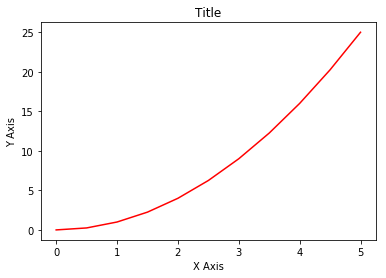

In [5]:
plt.plot(x, y, 'red') # 'red' can also be abbreviated as 'r'
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Title')
plt.show()

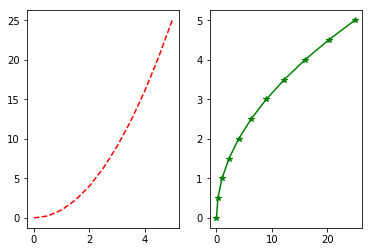

In [6]:
plt.subplot(1,2,1) # plt.subplot(nrows, ncols, plot_number)
plt.plot(x, y, 'r--') # red dashed line
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-'); # green dashed line

# Ending code with ';' suppresses data output 
#   ...Doing so makes for a cleaner plot

## Object Oriented 2D Plots

This approach improves usability when making more complex plots or dealing with a canvas and multiple plots.

Code is more complicated, but we have full control the plot axes and can add more than one axis to the figure.

### Basic Example

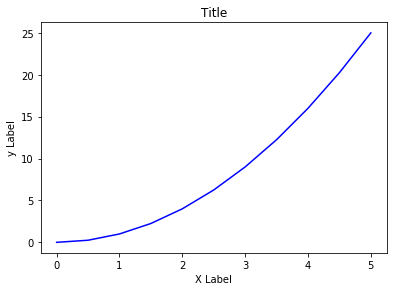

In [9]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
# ...left, bottom, width, height [0,1]

# Plot on the axes
axes.plot(x, y, 'blue')
axes.set_xlabel('X Label') # Use .set_ to begin methods!
axes.set_ylabel('y Label')
axes.set_title('Title');

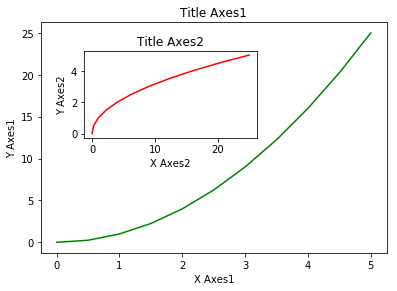

In [10]:
# Create blank canvas
fig = plt.figure()

# Create main axes
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Create inset axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# Main Figure
axes1.plot(x, y, 'g')
axes1.set_xlabel('X Axes1')
axes1.set_ylabel('Y Axes1')
axes1.set_title('Title Axes1')

# Inset Figure
axes2.plot(y, x, 'r')
axes2.set_xlabel('X Axes2')
axes2.set_ylabel('Y Axes2')
axes2.set_title('Title Axes2');

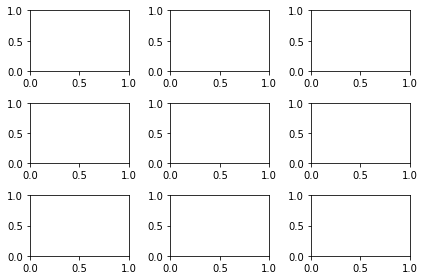

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=3)

# Add tight_layout -- it eliminates object overlap!
plt.tight_layout()

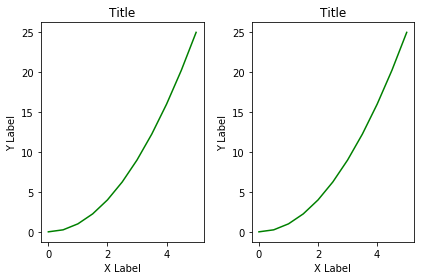

In [16]:
# 'axes' is an array of axes that we can 
#    iterate through with a for loop...

fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_title('Title')

# Display figure object    
fig.tight_layout();

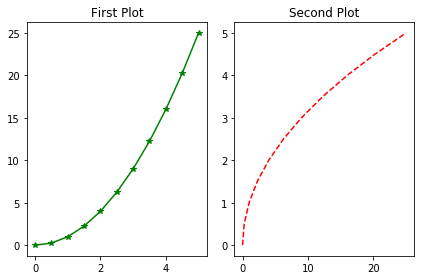

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(x,y,'g*-')
axes[0].set_title('First Plot')

axes[1].plot(y,x,'r--')
axes[1].set_title('Second Plot')

plt.tight_layout();

### Aspect ratio and DPI can be specified when creating the fig object

```py
fig = plt.figure(figsize=(8,4),dpi=100) 
# figsize(width,height) is in inches
```

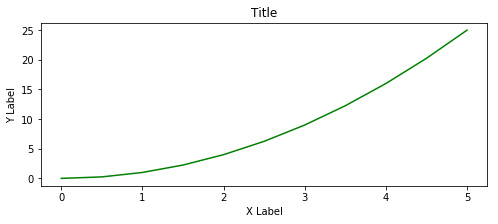

In [26]:
# Figsize and DPI can also be passed to the layout manager...

fig, axes = plt.subplots(figsize=(8,3))

axes.plot(x, y, 'g')
axes.set_xlabel('X Label')
axes.set_ylabel('Y Label')
axes.set_title('Title');

## Saving Figures

Output formats include PNG, JPG, EPS, SVG, PGF and PDF
```py
fig.savefig("filename.png", dpi=200)
```

## Line and Marker Styles

1. `color` can be either color name or RGB hex code
1. `alpha` sets transparency [0,1]
1. `linewidth` or `lw`
1. `linestyle` or `ls`
1. `marker`
1. `markersize`
1. `markerfacecolor`
1. `markeredgewidth`
1. `markeredgecolor`

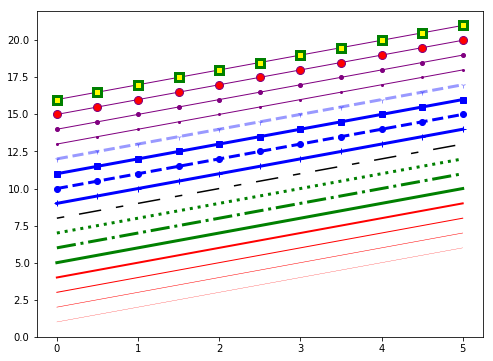

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestyle options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) 
# ...format: line length, space length, ...

# possible marker symbols: marker = 
#  '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", alpha=0.4, lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', 
        marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', 
        marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', 
        marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', 
        marker='s', markersize=8, markerfacecolor="yellow", 
        markeredgewidth=3, markeredgecolor="green");

## Plot Range

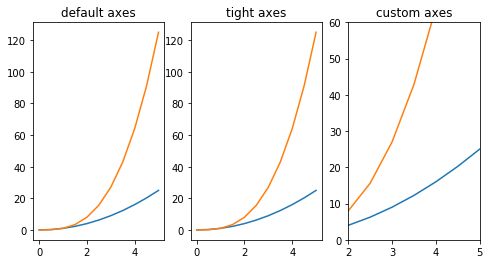

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes");